In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdts
import pandas as pd
from scipy import stats
from scipy.integrate import quad
import seaborn as sns
from scipy import stats
houses = pd.read_csv("train.csv")

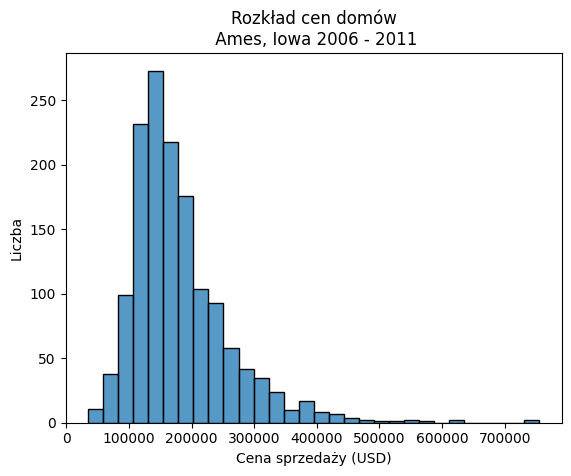

In [4]:
sns.histplot(data=houses, x='SalePrice', bins=30)
plt.title("Rozkład cen domów\n Ames, Iowa 2006 - 2011")
plt.xlabel("Cena sprzedaży (USD)")
plt.ylabel("Liczba")
plt.show()

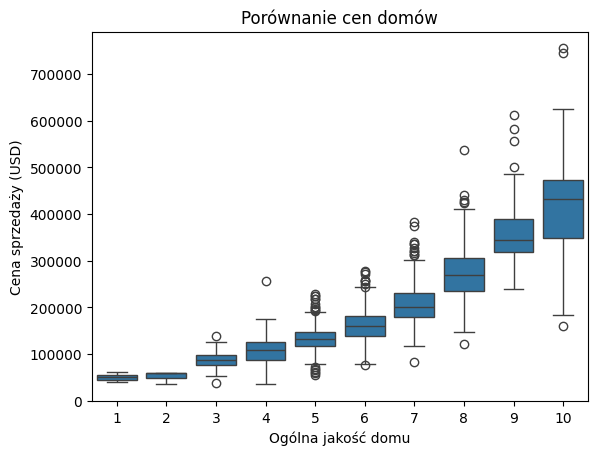

In [5]:
sns.boxplot(data=houses, x='OverallQual', y='SalePrice')
plt.title("Porównanie cen domów")
plt.xlabel("Ogólna jakość domu")
plt.ylabel("Cena sprzedaży (USD)")
plt.show()

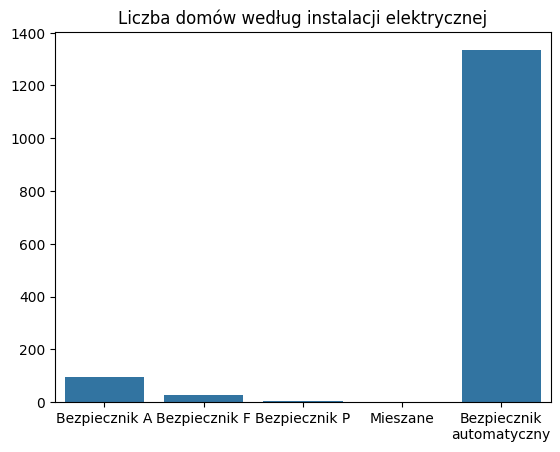

In [43]:
houses_electrical = houses.groupby('Electrical').size().reset_index(name = 'Count')
ax = sns.barplot(data=houses_electrical, x='Electrical', y='Count')
plt.title("Liczba domów według instalacji elektrycznej")
ax.set_xticks(houses_electrical['Electrical'])
ax.set_xticklabels(['Bezpiecznik A', 'Bezpiecznik F', 'Bezpiecznik P',
                   'Mieszane', 'Bezpiecznik\nautomatyczny'])
ax.set(xlabel=None, ylabel=None)
plt.show()

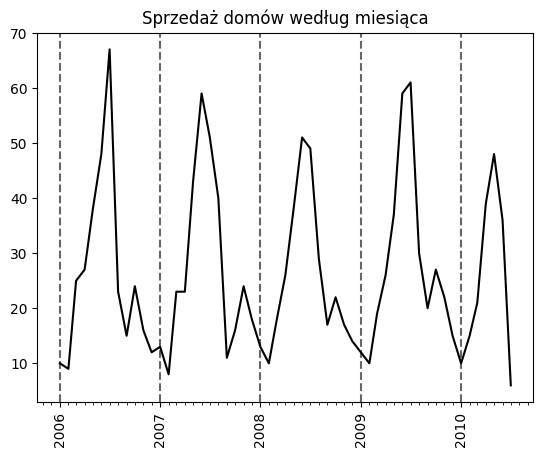

In [54]:
houses_date_sold = houses.groupby(['YrSold','MoSold']).size().reset_index(name = 'Count')
houses_date_sold['Date'] = pd.to_datetime(
    houses_date_sold[['YrSold', 'MoSold']]
    .rename(columns={'YrSold':'year','MoSold':'month'})
    .assign(Day=1)
    )
years = mdts.YearLocator()
months = mdts.MonthLocator()
years_format = mdts.DateFormatter('%Y')
ax = sns.lineplot(data=houses_date_sold, x='Date', y='Count', color='black')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_format)
ax.xaxis.set_minor_locator(months)
ax.set(xlabel=None, ylabel=None)
for year in houses_date_sold['Date'].dt.year.unique():
    ax.axvline(pd.Timestamp(year=year, month=1, day=1), linestyle='--', alpha=0.6, color='black')
plt.xticks(rotation = 'vertical')
plt.title("Sprzedaż domów według miesiąca")
plt.show()

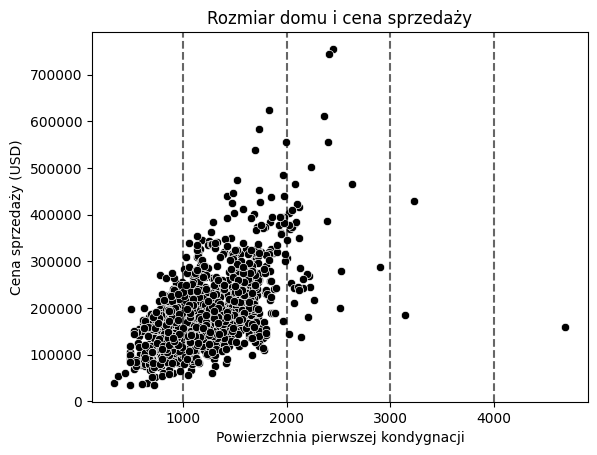

In [58]:
ax = sns.scatterplot(data=houses, x='1stFlrSF', y='SalePrice', color='black')
for area in [1000, 2000, 3000, 4000]:
  ax.axvline(area, linestyle='--', alpha=0.6, color='black')
plt.title('Rozmiar domu i cena sprzedaży')
plt.xlabel('Powierzchnia pierwszej kondygnacji')
plt.ylabel('Cena sprzedaży (USD)')
plt.show()